## Final Project Submission

Please fill out:
* Student name: Kenneth Kimani
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

Microsoft Movie Production Need Analysis

OVERVIEW
The project analyzes was to provide actionable insight to the Microsoft Head of new movie Studio. The analysis used data from 3 sources namely: Movie_info, reviews and bom movie.

Key Takeouts:
Top 5 movie genre to produce fall under the five big catergorirs Action and Adventure|Classics|Drama, Drama|Science Fiction and Fantasy,Drama|Musical and Performing Arts, Drama|Mystery and Suspense and Drama|Kids and Family' 'Comedy

The optimal Movie duration is critical to the Audience.

Understading the different season patterns to release new movies.

Speak into the production cost.




Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Data Understanding

The Movie_info data source contains movie details from 1921 to 2018.The data entails movie theater release dates, the writer, director and the movie rating categories.

The Movie budget data source contains the name, release date, the production costs and both the domestic and foreign earnings from 2014 t0 2020.

The bom movie data source has the movie title,studio,domestic and foreign earunings and release year.The data runs from 2010 to 2020.

Import Data from the CSV files.We first import the needed libraries.


In [2]:
#import the needed libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the movie_info into a DataFrame and Explore the data.
The Movie_info data source contains movie details from 1921 t0 2018.The data entails movie theater relaese dates, the writer, director and the movie rating categories.


In [3]:
movie_information = pd.read_csv('/content/rt.movie_info.tsv', delimiter='\t',index_col=0)
movie_information.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
#movie_rating = movie_information.pivot(index='synopsis', columns='director', values='currency')
#movie_rating.head()

Conduct some data Exploratory data analysis.

In [5]:
movie_information.shape

(1560, 11)

In [6]:
movie_information.describe()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"600,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


In [7]:
movie_information.duplicated().value_counts()

False    1556
True        4
dtype: int64

In [8]:
# Convert the theater_date to datetime
movie_information['theater_date'] =  pd.to_datetime(movie_information['theater_date'])
movie_information['theater_date'].describe()

<ipython-input-8-86242a280f5e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movie_information['theater_date'].describe()


count                    1201
unique                   1025
top       1987-01-01 00:00:00
freq                        8
first     1921-01-01 00:00:00
last      2018-10-19 00:00:00
Name: theater_date, dtype: object

Explore the Director column to understand the top talents.

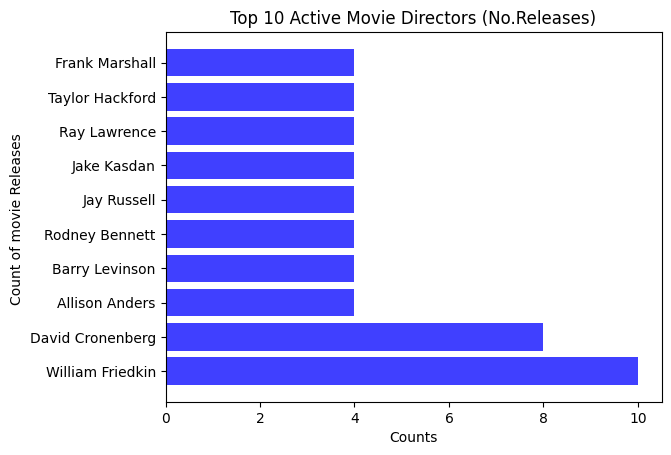

In [9]:

top_director = movie_information["director"].unique()[:10]

top_director_counts = movie_information["director"].value_counts().nlargest(10).tolist()

#print("Genre:", top_genre)
#print("Counts:", top_genre_counts)

#sns.barplot(data = movie_information, y = top_director_counts, x = top_director )

y= top_director
 
# getting values against each value of y
x= top_director_counts
plt.barh(y, x , color = 'blue' , alpha =0.75)

 
# setting label of y-axis
plt.ylabel("Count of movie Releases ")
 
# setting label of x-axis
plt.xlabel("Counts")
plt.title("Top 10 Active Movie Directors (No.Releases)")
plt.show()

In [67]:
movie_information.groupby('rating')['director'].sum()
print(movie_information.groupby('rating')['director'].sum())

rating
G        Roy RowlandJohn LasseterMichael RubboLeo McCar...
NC17                                           John Waters
NR       Rodney BennettWilliam WellmanEdward DmytrykTer...
PG       Jay RussellRick RosenthalMartyn BurkeSteve Boy...
PG-13    Jake KasdanFrank MarshallWilliam FriedkinCarl ...
R        William FriedkinDavid CronenbergAllison Anders...
Name: director, dtype: object


In [11]:
#Check on the missing data. 
movie_information.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Identify the relevant columns for your analysis and create a new dataframe.

In [12]:
relevant_columns=['rating','genre','runtime','director','theater_date']

In [13]:
#create a new dataframe and check for missing data.
summary_columns = movie_information[relevant_columns]
summary_columns.isna().describe

<bound method NDFrame.describe of       rating  genre  runtime  director  theater_date
id                                                  
1      False  False    False     False         False
3      False  False    False     False         False
5      False  False    False     False         False
6      False  False    False     False         False
7      False  False    False     False          True
...      ...    ...      ...       ...           ...
1996   False  False    False      True         False
1997   False  False    False     False         False
1998   False  False    False     False         False
1999   False  False    False     False         False
2000   False  False    False      True         False

[1560 rows x 5 columns]>

In [14]:
#Drop data from rows with NAN values from the selected columns in the new dataframe
clean_columns_mov_info = summary_columns.dropna(axis =0,subset =['director','theater_date','runtime'])

In [15]:
#Check the significance difference after dropping.
clean_columns_mov_info.shape

(1076, 5)

In [16]:
#summary_columns
#import datetime
#Split the theater date columns into %dd%mm%yy and add to the new dataframe- convert the running time to hours
clean_columns_mov_info['month'] = clean_columns_mov_info['theater_date'].dt.month
clean_columns_mov_info['year'] = clean_columns_mov_info['theater_date'].dt.year
clean_columns_mov_info['date'] = clean_columns_mov_info['theater_date'].dt.day
clean_columns_mov_info['day_week'] = clean_columns_mov_info['theater_date'].dt.day_name()
clean_columns_mov_info[['hours', 'time_unit']] = clean_columns_mov_info["runtime"].apply(lambda x: pd.Series(str(x).split(" ")))
clean_columns_mov_info[["hours"]] = clean_columns_mov_info[["hours"]].apply(pd.to_numeric)/60
clean_columns_mov_info

<ipython-input-16-9c27a1aee98c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_columns_mov_info['month'] = clean_columns_mov_info['theater_date'].dt.month
<ipython-input-16-9c27a1aee98c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_columns_mov_info['year'] = clean_columns_mov_info['theater_date'].dt.year
<ipython-input-16-9c27a1aee98c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,rating,genre,runtime,director,theater_date,month,year,date,day_week,hours,time_unit
id,,,,,,,,,,,
1,R,Action and Adventure|Classics|Drama,104 minutes,William Friedkin,1971-10-09,10,1971,9,Saturday,1.733333,minutes
3,R,Drama|Science Fiction and Fantasy,108 minutes,David Cronenberg,2012-08-17,8,2012,17,Friday,1.800000,minutes
5,R,Drama|Musical and Performing Arts,116 minutes,Allison Anders,1996-09-13,9,1996,13,Friday,1.933333,minutes
6,R,Drama|Mystery and Suspense,128 minutes,Barry Levinson,1994-12-09,12,1994,9,Friday,2.133333,minutes
8,PG,Drama|Kids and Family,95 minutes,Jay Russell,2000-03-03,3,2000,3,Friday,1.583333,minutes
...,...,...,...,...,...,...,...,...,...,...,...
1993,PG,Comedy,95 minutes,James Lapine,1993-06-04,6,1993,4,Friday,1.583333,minutes
1995,PG-13,Action and Adventure|Comedy|Western,107 minutes,Barry Sonnenfeld,1999-06-30,6,1999,30,Wednesday,1.783333,minutes
1997,PG,Comedy|Science Fiction and Fantasy,88 minutes,Steve Barron,1993-07-23,7,1993,23,Friday,1.466667,minutes


In [17]:
#clean_columns_mov_info.info()
clean_columns_mov_info.head()

,rating,genre,runtime,director,theater_date,month,year,date,day_week,hours,time_unit
id,,,,,,,,,,,
1,R,Action and Adventure|Classics|Drama,104 minutes,William Friedkin,1971-10-09,10,1971,9,Saturday,1.733333,minutes
3,R,Drama|Science Fiction and Fantasy,108 minutes,David Cronenberg,2012-08-17,8,2012,17,Friday,1.800000,minutes
5,R,Drama|Musical and Performing Arts,116 minutes,Allison Anders,1996-09-13,9,1996,13,Friday,1.933333,minutes
6,R,Drama|Mystery and Suspense,128 minutes,Barry Levinson,1994-12-09,12,1994,9,Friday,2.133333,minutes
8,PG,Drama|Kids and Family,95 minutes,Jay Russell,2000-03-03,3,2000,3,Friday,1.583333,minutes


In [18]:
#This gives a quick glance on the statistical measures of the numerical dataset
# Average runtime for a movie is 1.7 hours or 106 minutes
clean_columns_mov_info.describe()

,month,year,date,hours
count,1076.000000,1076.000000,1076.000000,1076.000000
mean,6.506506,1991.498141,13.869888,1.771747
std,3.638420,19.721526,9.382804,0.360515
min,1.000000,1921.000000,1.000000,0.866667
25%,3.000000,1983.000000,5.000000,1.550000
50%,7.000000,1996.000000,13.000000,1.700000
75%,10.000000,2006.000000,22.000000,1.933333
max,12.000000,2018.000000,31.000000,5.966667


In [19]:
top_director = clean_columns_mov_info["director"].unique()[:3]
top_genre = clean_columns_mov_info["genre"].unique()[:10]
top_director_counts = clean_columns_mov_info["director"].value_counts().nlargest(10).tolist()

active_years = clean_columns_mov_info["year"].value_counts().nlargest(10)



In [20]:
#movie_rating = movie_information.pivot(index='synopsis', columns='director', values='currency')
#movie_rating.head()

Analysis

Text(0.5, 1.0, 'Best day of the Week to premiere a Movie in Theaters')

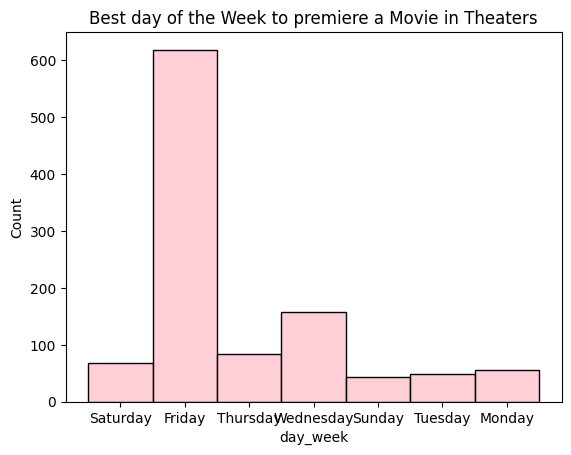

In [69]:
#Plot a histogram showing movie releases by months. understand the best time.
#Data is consistent with the industry norm.It is a common practice that Friday is reserved as the day for movie theaters to premiere new 
#films due to the fact that many people want to watch the movie during their weekends
sns.histplot(data = clean_columns_mov_info, x ="day_week",color ="pink",bins=10).set_title('Best day of the Week to premiere a Movie in Theaters')


In [22]:
#Top Movie Genre
top_genre = clean_columns_mov_info["genre"].unique()[:10]

top_genre_counts = clean_columns_mov_info["genre"].value_counts().nlargest(10).tolist()

print("Genre:", top_genre)
print("Counts:", top_genre_counts)

Genre: ['Action and Adventure|Classics|Drama' 'Drama|Science Fiction and Fantasy'
 'Drama|Musical and Performing Arts' 'Drama|Mystery and Suspense'
 'Drama|Kids and Family' 'Comedy' 'Drama'
 'Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy'
 'Classics|Comedy|Drama' 'Comedy|Drama|Mystery and Suspense']
Counts: [95, 83, 58, 48, 32, 29, 26, 25, 24, 23]


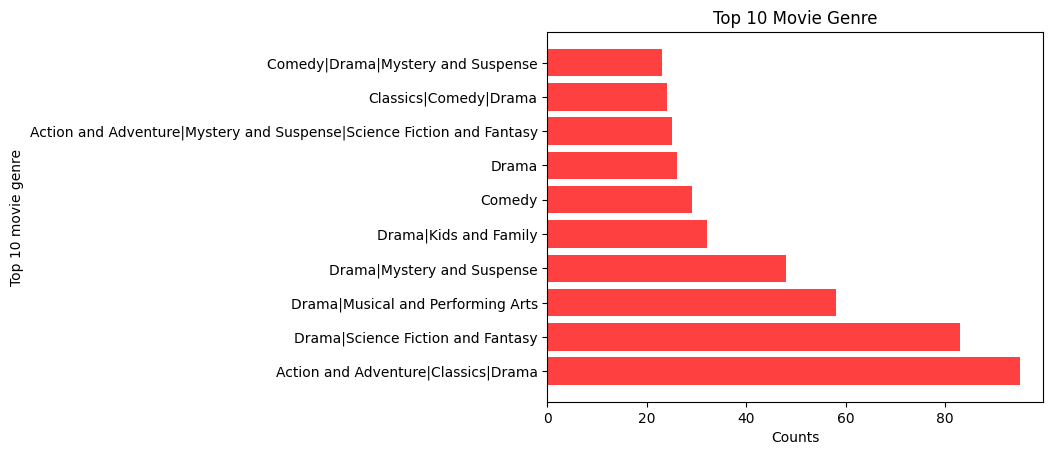

In [23]:
#Filter the top movie genres
y= top_genre
 
# getting values against each value of y
x= top_genre_counts
plt.barh(y, x , color = 'red' , alpha =0.75)

 
# setting label of y-axis
plt.ylabel("Top 10 movie genre")
 
# setting label of x-axis
plt.xlabel("Counts")
plt.title("Top 10 Movie Genre")
plt.show()

<Axes: xlabel='month', ylabel='count'>

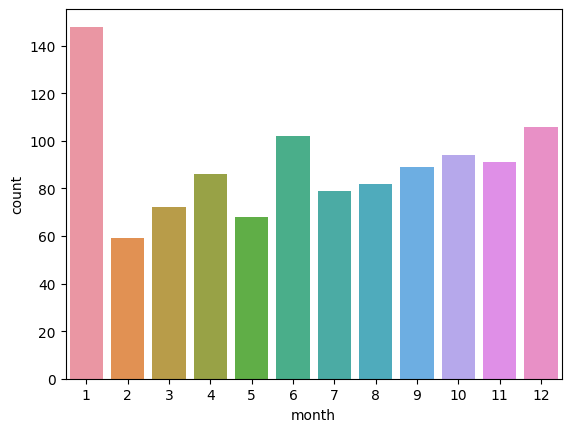

In [24]:
#sns.pairplot(data = clean_columns_mov_info)
sns.countplot(x="month", data=clean_columns_mov_info)#hue="year",

<Axes: xlabel='director', ylabel='count'>

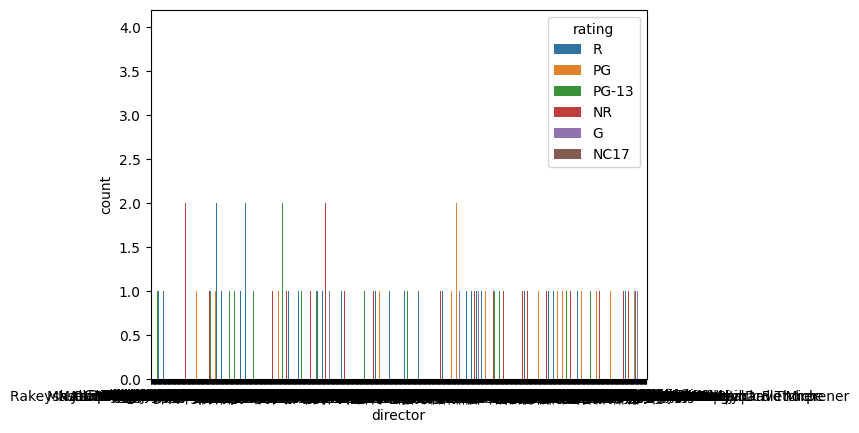

In [72]:
sns.countplot(x="director", hue="rating",data=clean_columns_mov_info)


Load the review data into a DataFrame and do some exploratory 

In [26]:
movie_reviews =pd.read_csv('/content/rt.reviews.tsv', delimiter='\t',  encoding='latin-1')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [27]:
movie_reviews['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

Load the tmdb movie
 data into a DataFrame and do some exploratory

In [28]:
mdb_movies = pd.read_csv('/content/tmdb.movies.csv',index_col=0)
mdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
top_language = mdb_movies['original_language'].unique()[:10]
top_language_count = mdb_movies['original_language'].value_counts().nlargest(10).tolist()
#top_language_sum = mdb_movies('top_language_count').sum()[:10]
#top_language_percentage = top_language_sum / top_language_count = mdb_movies *100
print("Language:", top_language)

print("Counts:", top_language_count)





Language: ['en' 'nl' 'es' 'ja' 'sv' 'de' 'fr' 'cn' 'it' 'ru']
Counts: [23291, 507, 455, 298, 265, 237, 177, 172, 123, 96]


Text(0.5, 1.0, 'Top 10 Original Movie Language')

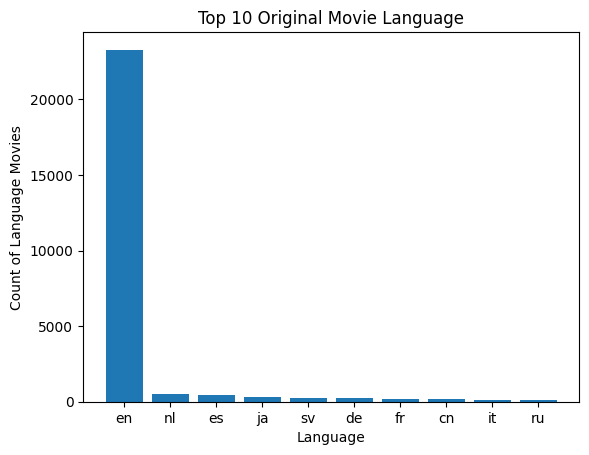

In [73]:
bar_chart_title = "Top 10 Original Movie Language"

fig, ax = plt.subplots()


ax.bar(top_language,top_language_count)
ax.set_xlabel('Language')
ax.set_ylabel('Count of Language Movies')
ax.set_title(bar_chart_title)


In [ ]:
none_english 

In [31]:
mdb_movies['genre_ids'].unique

<bound method Series.unique of 0            [12, 14, 10751]
1        [14, 12, 16, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 878, 12]
                ...         
26512               [27, 18]
26513               [18, 53]
26514           [14, 28, 12]
26515        [10751, 12, 28]
26516               [53, 27]
Name: genre_ids, Length: 26517, dtype: object>

In [32]:
mdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [33]:
mdb_movies.shape

(26517, 9)

In [34]:
mdb_movies.duplicated().value_counts()

False    25497
True      1020
dtype: int64

Load the movie budgetdata into a DataFrame and do some exploratory.

In [35]:
#Load the csv data
movie_budget = pd.read_csv('/content/tn.movie_budgets.csv',index_col=0)
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [36]:
movie_budget.dtypes

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [37]:
#convert the release date data into datetime
movie_budget['release_date'] =  pd.to_datetime(movie_budget['release_date'])
movie_budget['release_date'].describe()

<ipython-input-37-dfb959834d69>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  movie_budget['release_date'].describe()


count                    5782
unique                   2418
top       2014-12-31 00:00:00
freq                       24
first     1915-02-08 00:00:00
last      2020-12-31 00:00:00
Name: release_date, dtype: object

In [38]:
#Remove the characters using a function.Example $ and ,
def remove_character(data, cols, characters):
    """simple function to remove characters"""
    # loop through the columns
    for col in cols:
        data[col] = data[col].str.strip(characters)

    return data.head()

remove_character(movie_budget, ['production_budget', 'domestic_gross', 'worldwide_gross'],'$')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [39]:
#movie_budget.dtypes

In [40]:
#movie_budget.head()

In [41]:
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(',','')
movie_budget['domestic_gross'] = pd.to_numeric(movie_budget['domestic_gross'])


In [42]:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',','')
movie_budget['production_budget'] = pd.to_numeric(movie_budget['production_budget'])


In [43]:
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',','')
movie_budget['worldwide_gross'] = pd.to_numeric(movie_budget['worldwide_gross'])

In [44]:
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])

In [45]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [46]:
#CHECK THE DATAFRAME WITH THE ADDED COLUMNS(ADD THE COLUMNS)
movie_budget['month'] = movie_budget['release_date'].dt.month
movie_budget['year'] = movie_budget['release_date'].dt.year
movie_budget['day'] = movie_budget['release_date'].dt.day
movie_budget['total_gross'] = movie_budget[ 'domestic_gross']+ movie_budget['worldwide_gross']
movie_budget['net_gross'] = movie_budget['total_gross']- movie_budget['production_budget']
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,day,total_gross,net_gross
id,,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,12,2009,18,3536852904,3111852904
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,20,1286727750,876127750
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,7,192524700,-157475300
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1,1862019831,1531419831
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,15,1936903129,1619903129


In [47]:
#CHECK FOR STATISTICAK MEASUREMENT FOR THE COLUMNS WITH NUMERICAL DATA 
movie_budget_clean  = movie_budget
#movie_budget_clean =['production_budget']
movie_budget_clean.describe()

,production_budget,domestic_gross,worldwide_gross,month,year,day,total_gross,net_gross
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,7.050675,2003.967139,16.401245,1.333608e+08,1.017730e+08
std,4.181208e+07,6.824060e+07,1.747200e+08,3.480147,12.724386,8.803660,2.399411e+08,2.108880e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,1.000000,1915.000000,1.000000,0.000000e+00,-1.574753e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,4.000000,2000.000000,9.000000,6.448924e+06,-3.098222e+05
50%,1.700000e+07,1.722594e+07,2.798445e+07,7.000000,2007.000000,17.000000,4.605855e+07,2.499538e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07,10.000000,2012.000000,24.000000,1.506937e+08,1.111648e+08
max,4.250000e+08,9.366622e+08,2.776345e+09,12.000000,2020.000000,31.000000,3.536853e+09,3.111853e+09


In [48]:
movie_budget_clean.duplicated().value_counts()

False    5782
dtype: int64

In [49]:
movie_budget_clean['production_budget'].corr(movie_budget_clean['month'])

0.02257524976931849

In [50]:
movie_budget_clean.corr()

<ipython-input-50-765aa2c9200e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie_budget_clean.corr()


,production_budget,domestic_gross,worldwide_gross,month,year,day,total_gross,net_gross
production_budget,1.000000,0.685682,0.748306,0.022575,0.176091,-0.019217,0.739912,0.643580
domestic_gross,0.685682,1.000000,0.938853,0.028034,0.036690,-0.041380,0.968058,0.965476
worldwide_gross,0.748306,0.938853,1.000000,0.030288,0.100588,-0.029274,0.995194,0.983933
month,0.022575,0.028034,0.030288,1.000000,-0.020533,0.100438,0.030028,0.029689
year,0.176091,0.036690,0.100588,-0.020533,1.000000,0.034229,0.083681,0.060296
day,-0.019217,-0.041380,-0.029274,0.100438,0.034229,1.000000,-0.033085,-0.033833
total_gross,0.739912,0.968058,0.995194,0.030028,0.083681,-0.033085,1.000000,0.991066
net_gross,0.643580,0.965476,0.983933,0.029689,0.060296,-0.033833,0.991066,1.000000


Text(0.5, 1.0, 'Trend of the Annual Movie Releases from 1920 to 2020')

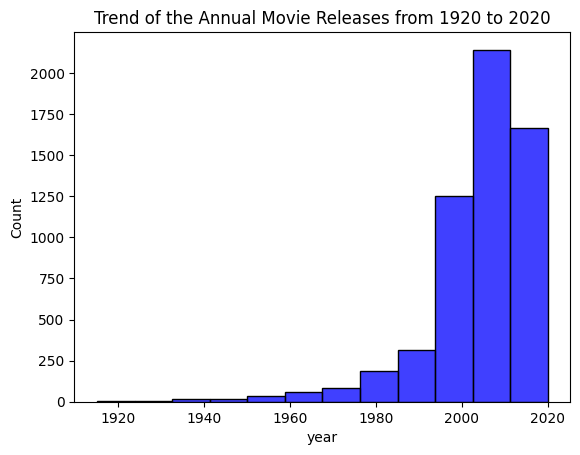

In [51]:
#he Movie Industry had tremendously growth over the period with peaks experienced in the the mid 2000's
sns.histplot(data = movie_budget_clean, x ="year",color ="blue",bins=12).set_title('Trend of the Annual Movie Releases from 1920 to 2020')


Text(0.5, 1.0, 'Number of Released Movies by Month')

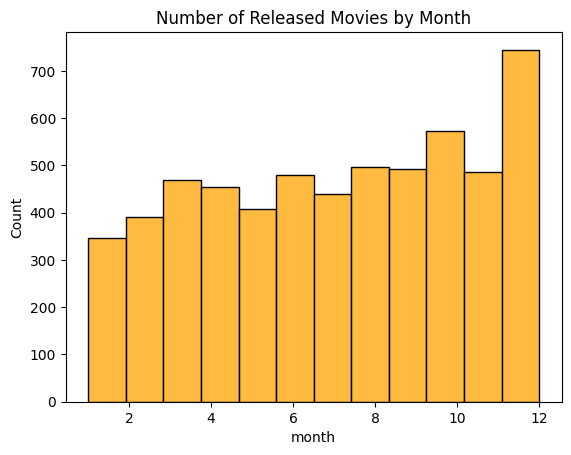

In [52]:
#The last quarter of a calender year is the best time to release new movies.
sns.histplot(x ="month",color ="orange",bins=12, data=movie_budget_clean).set_title('Number of Released Movies by Month')

<ipython-input-53-288af8a8debb>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = movie_budget_clean, x ="net_gross",y="production_budget", palette ='terrain').set_title('Correction between Production Budget and Net Revenue')


Text(0.5, 1.0, 'Correction between Production Budget and Net Revenue')

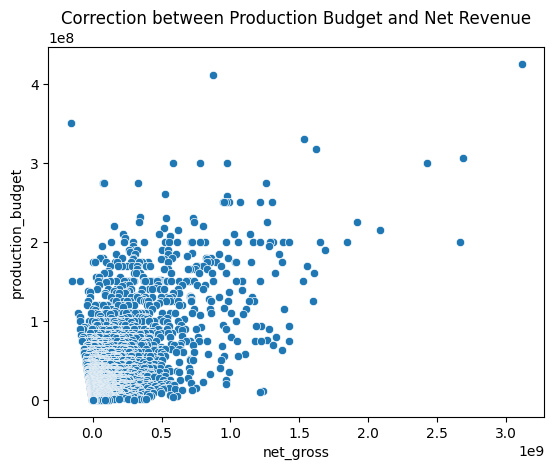

In [53]:
# A Majority of the movie breakeven after production with an estimated net revenue of between 300M-500M US dolars
sns.scatterplot(data = movie_budget_clean, x ="net_gross",y="production_budget", palette ='terrain').set_title('Correction between Production Budget and Net Revenue')

Text(0.5, 1.0, 'Correction between Production Budget and Net Earnings')

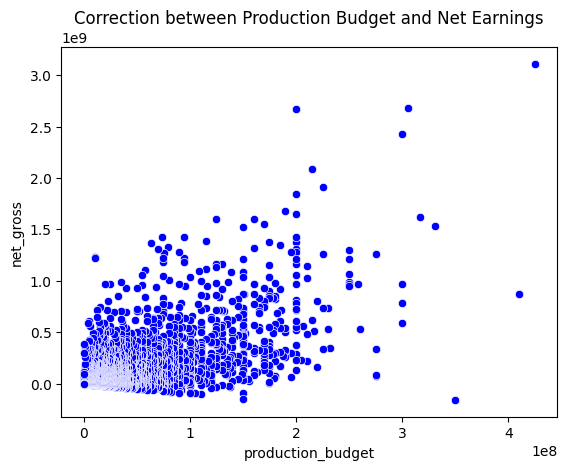

In [54]:
# A Majority of the movies breakeven after production with an estimated net revenue of between 300M-500M US dollars
sns.scatterplot(x='production_budget',y='net_gross',data = movie_budget_clean,color='blue').set_title('Correction between Production Budget and Net Earnings')

In [55]:
movie_budget.corr()

<ipython-input-55-d9e7636924a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie_budget.corr()


,production_budget,domestic_gross,worldwide_gross,month,year,day,total_gross,net_gross
production_budget,1.000000,0.685682,0.748306,0.022575,0.176091,-0.019217,0.739912,0.643580
domestic_gross,0.685682,1.000000,0.938853,0.028034,0.036690,-0.041380,0.968058,0.965476
worldwide_gross,0.748306,0.938853,1.000000,0.030288,0.100588,-0.029274,0.995194,0.983933
month,0.022575,0.028034,0.030288,1.000000,-0.020533,0.100438,0.030028,0.029689
year,0.176091,0.036690,0.100588,-0.020533,1.000000,0.034229,0.083681,0.060296
day,-0.019217,-0.041380,-0.029274,0.100438,0.034229,1.000000,-0.033085,-0.033833
total_gross,0.739912,0.968058,0.995194,0.030028,0.083681,-0.033085,1.000000,0.991066
net_gross,0.643580,0.965476,0.983933,0.029689,0.060296,-0.033833,0.991066,1.000000


In [56]:
movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
month                0
year                 0
day                  0
total_gross          0
net_gross            0
dtype: int64

In [57]:
movie_budget.shape

(5782, 10)

Load the bom_movie data.

In [58]:
bom_movie = pd.read_csv('/content/bom.movie_gross.csv')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Add a New columns showing the total gross earning per movie

In [59]:
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].str.replace(',','')
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'])

In [60]:
bom_movie['total_gross'] = bom_movie['domestic_gross'] + bom_movie['foreign_gross']
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [61]:
bom_movie.corr()

<ipython-input-61-a66b3eb6edc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bom_movie.corr()


,domestic_gross,foreign_gross,year,total_gross
domestic_gross,1.000000,0.767991,0.018708,0.904548
foreign_gross,0.767991,1.000000,0.145653,0.967759
year,0.018708,0.145653,1.000000,0.143127
total_gross,0.904548,0.967759,0.143127,1.000000


A better understanding of your competitor(s) will position Microsoft at a better place through improving their current models.More analysis is required to better understand the business strategies, business models and their go to market channels(Distribution chain)

In [62]:
top_studio = bom_movie["studio"].unique()[:10]
top_studio_counts = bom_movie["studio"].value_counts().nlargest(10).tolist()
movie_rel_year = bom_movie['year'].unique()
top_studio_gross = bom_movie['total_gross'].sum()

print("Studio:", top_studio)
print("Counts:", top_studio_counts)
print("Years:", movie_rel_year)
print("gross:", top_studio_gross)

Studio: ['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS']
Counts: [166, 147, 140, 136, 136, 123, 110, 106, 103, 101]
Years: [2010 2011 2012 2013 2014 2015 2016 2017 2018]
gross: 246486889161.5


Text(0.5, 1.0, 'Correlation between Domestic gross and Foreign gross')

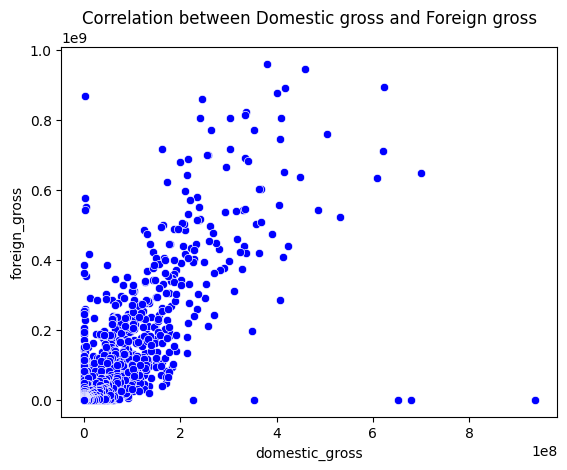

In [63]:
#Based on correlation alone, domestic gross earnings and foreign gross earnings have a relatively strong positive relationship.
sns.scatterplot(x='domestic_gross',y='foreign_gross',data = bom_movie,color='blue').set_title('Correlation between Domestic gross and Foreign gross')

Text(0.5, 1.0, 'Top 10 Most Common Movie Studio')

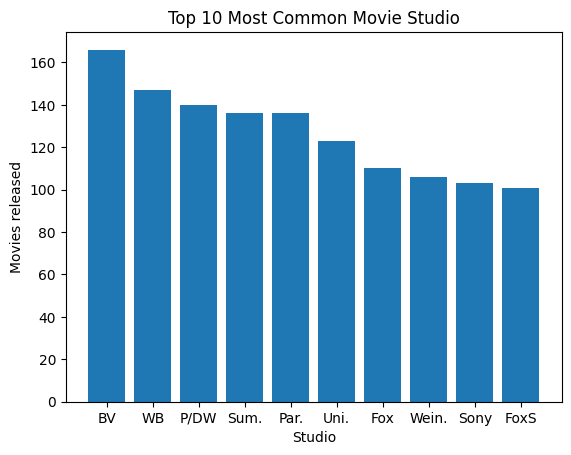

In [64]:
# A glance of the Top 10 Movie Studios
bar_chart_title = "Top 10 Most Common Movie Studio"

fig, ax = plt.subplots()


ax.bar(top_studio,top_studio_counts)
ax.set_xlabel('Studio')
ax.set_ylabel('Movies released')
ax.set_title(bar_chart_title)


In [65]:
#bar_chart_title = "Top 10 Most Common Movie Studio"

#fig, ax = plt.subplots()


#ax.bar(movie_rel_year , top_studio)
##ax.set_xlabel('Release_Year')
#ax.set_ylabel('Studio')
#ax.set_title(bar_chart_title)

In [66]:
movie_rel_year = bom_movie['year'].unique()
movie_rel_year

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])